In [18]:
import numpy as np
import scipy.linalg

In [75]:
A=np.array([[-0.7108,-2.995],[1.336,-0.7892]])
x0= np.array([[-5], [2]])
D, V = np.linalg.eig(A)
V_inv = np.linalg.inv(V)
print("lambdas/eigen values:",D); print("S/eigen vectors = ",V); print("S^-1 = ",V_inv)
print("The coefficients a1, a2 based on the initial conditions [-5,2] are S^-1 * x0: ", V_inv @ x0)


lambdas/eigen values: [-0.75+1.99994584j -0.75-1.99994584j]
S/eigen vectors =  [[0.83158055+0.j         0.83158055-0.j        ]
 [0.01088413-0.55529751j 0.01088413+0.55529751j]]
S^-1 =  [[ 6.01264666e-01-0.01178511j  1.40643222e-18+0.90041822j]
 [ 6.01264666e-01+0.01178511j -1.40643222e-18-0.90041822j]]
The coefficients a1, a2 based on the initial conditions [-5,2] are S^-1 * x0:  [[-3.00632333+1.85976198j]
 [-3.00632333-1.85976198j]]


In [80]:
A=np.array([[-0.7108,-2.995],[1.336,-0.7892]])
x0= np.array([[-5], [2]])
D, V = np.linalg.eig(A)
V_inv = np.linalg.inv(V)
print("eigen values/lambdas of A: ");print(D); print("eigen vectors/S of A are:");print(V);
print("S^-1 = "); print(V_inv)
lbd_2 = np.array([[np.exp(D[0]*2),0], [0,np.exp(D[1]*2)]])
print("[e^(lambda1 * t),e^(lambda2 * t)] * I = "); print(lbd_2)
expa2 = scipy.linalg.expm(A*2)
print("e^At using scipy.linalg.expm(A*2) = "); print(expa2)
print("e^At using S * lbs_2 * S^-1 = "); print(V @ lbd_2 @ V_inv)
print("Therefore, e^At = S * lbs_2 * S^-1")

eigen values/lambdas of A: 
[-0.75+1.99994584j -0.75-1.99994584j]
eigen vectors/S of A are:
[[0.83158055+0.j         0.83158055-0.j        ]
 [0.01088413-0.55529751j 0.01088413+0.55529751j]]
S^-1 = 
[[ 6.01264666e-01-0.01178511j  1.40643222e-18+0.90041822j]
 [ 6.01264666e-01+0.01178511j -1.40643222e-18-0.90041822j]]
[e^(lambda1 * t),e^(lambda2 * t)] * I = 
[[-0.1458659-0.16884966j  0.       +0.j        ]
 [ 0.       +0.j         -0.1458659+0.16884966j]]
e^At using scipy.linalg.expm(A*2) = 
[[-0.14917544  0.25285922]
 [-0.11279463 -0.14255635]]
e^At using S * lbs_2 * S^-1 = 
[[-0.14917544+0.j  0.25285922+0.j]
 [-0.11279463+0.j -0.14255635+0.j]]
Therefore, e^At = S * lbs_2 * S^-1


In [81]:
x2 = np.array([[-2], [-2]])
x0_1 = np.linalg.inv(expa2) @ x2
print("(e^(A*2))^-1= ");print(np.linalg.inv(expa2))
print("New I.C. for x(t=2) = [-2,-2] is (e^(A*2))^-1 @ x(t=2) = "); print(x0_1)

(e^(A*2))^-1= 
[[-2.86332091 -5.07881314]
 [ 2.26554069 -2.9962688 ]]
New I.C. for x(t=2) = [-2,-2] is (e^(A*2))^-1 @ x(t=2) = 
[[15.8842681 ]
 [ 1.46145623]]


In [83]:
A1 = np.array([[ -64.0859, -22.6535]
,[177.346, 62.6859]])
print("Matrix A = "); print(A1)
D1, V1 = np.linalg.eig(A1)
print("Eigen Values: "); print(D1); print("Eigen Vectors:"); print(V1)
B = scipy.linalg.expm(A1*1.5)
print("B = e^(A*1.5) = "); print(B)
prop = B.T @ B
print("Propogator matrix = B.T @ B = ");print(prop)
D2, V2 = np.linalg.eig(prop)
print("Eigen Values of Propogator = ");print(D2);print("Eigen Vectors of Propogator = "); print(V2)
print("lambda1 > lambda2 so e1 is the optimal initial condition (x0 = e1) for maximal amplitude at t = 1.5")
print("Therefore, Solution at t = 1.5 with e1 as initial conditions is B * e1 = ");print(B @ V2[:,0])
x0_1 = V2[:,0]
V1_inv = np.linalg.inv(V1)
print("S^-1 = "); print(V1_inv)
coefs = V1_inv @ x0_1
print("coefficients a1, a2 = S^-1 @ x0 = S^-1 @ e1 ="); print(coefs)

Matrix A = 
[[-64.0859 -22.6535]
 [177.346   62.6859]]
Eigen Values: 
[-1.21449763 -0.18550237]
Eigen Vectors:
[[-0.33898168  0.33413689]
 [ 0.94079297 -0.94252456]]
B = e^(A*1.5) = 
[[-36.21474262 -13.10698802]
 [102.609835    37.13359048]]
Propogator matrix = B.T @ B = 
[[11840.28582223  4284.93778941]
 [ 4284.93778941  1550.69667656]]
Eigen Values of Propogator = 
[1.33909825e+04 1.11982672e-06]
Eigen Vectors of Propogator = 
[[ 0.94031826 -0.34029628]
 [ 0.34029628  0.94031826]]
lambda1 > lambda2 so e1 is the optimal initial condition (x0 = e1) for maximal amplitude at t = 1.5
Therefore, Solution at t = 1.5 with e1 as initial conditions is B * e1 = 
[-38.51364326 109.12232485]
S^-1 = 
[[-183.19514458  -64.94499818]
 [-182.85858307  -65.88666318]]
coefficients a1, a2 = S^-1 @ x0 = S^-1 @ e1 =
[-194.36228201 -194.36625218]


Text(0, 0.5, '$|x(t)|$')

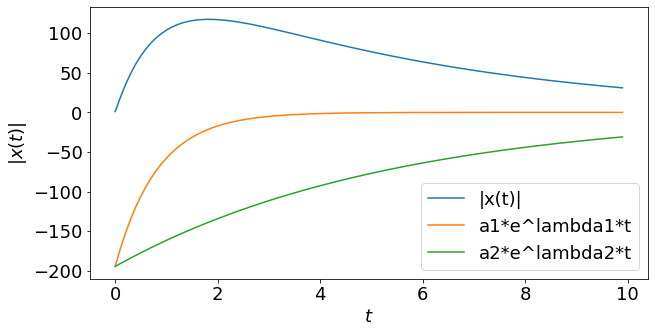

In [64]:
import matplotlib.pyplot as plt
import matplotlib

t_range=np.arange(0,10,0.1)
N=np.size(t_range)
xnorm=np.zeros((N,1))
coef1 = np.zeros((N,1))
coef2 = np.zeros((N,1))
i=-1
for t in t_range:
    i=i+1
    xnorm[i]=scipy.linalg.norm(scipy.linalg.expm(A1*t)@x0_1,ord=2)
    coef1[i] = coefs[0] * np.exp(D1[0]*t)
    coef2[i] = coefs[1] * np.exp(D1[1]*t)
fig1=plt.figure(figsize =(10,5)); plt.clf
plt.plot(t_range,xnorm, label = "|x(t)|")
plt.plot(t_range, coef1, label = "a1*e^lambda1*t")
plt.plot(t_range, coef2, label = "a2*e^lambda2*t")
plt.legend()
plt.xlabel('$t$',fontsize=18)
plt.ylabel('$|x(t)|$',fontsize=18)
# plt.title('transient amplification',fontsize=18)

In [93]:
mat = np.array([[5, -1, -1], [-10, 5, 3], [16, -2, -1]])
print("Matrix A = ");print(mat)
l,e = np.linalg.eig(mat)
print("Eigen values of A: "); print(l); print("Eigen vectors of A: "); print(e)
print("We can see that all the eigen values and the eigen vectors are almost same values.")
print("Determinant of the S matrix (Matrix with Eigen vectors as columns) = ");print(np.linalg.det(e))
print("We can also see that the determinant is 0.")
print("Thus we cannot use this S matrix to diagonalize A because it is singular.")
print("Solutions tod ODEs using matrix exponentiation assume that the matrix can be diagonalized.")
print("Since the matrix has same eigen values and vectors, A cannot be diagonalized as S * Lambda I * S^-1 since S^-1 cannot be computed.")
print("So we can use Jordan form of matrix A as a substitute to diagonalize by computing the eigen vectors and values of Jordan form")
print("In the simple case considered here, the Jordan form has the eigenvalues on the diagonal and ones just above the diagonal")
print("That is, we need to find a matrix M, such that M^−1AM = J. where J is Jordan form.")

Matrix A = 
[[  5  -1  -1]
 [-10   5   3]
 [ 16  -2  -1]]
Eigen values of A: 
[2.99998744+0.00000000e+00j 3.00000628+1.08756008e-05j
 3.00000628-1.08756008e-05j]
Eigen vectors of A: 
[[ 0.13736004+0.00000000e+00j -0.13736082-4.97958413e-07j
  -0.13736082+4.97958413e-07j]
 [-0.5494419 +0.00000000e+00j  0.54944243+4.97967793e-07j
   0.54944243-4.97967793e-07j]
 [ 0.82416371+0.00000000e+00j -0.82416322+0.00000000e+00j
  -0.82416322-0.00000000e+00j]]
We can see that all the eigen values and the eigen vectors are almost same values.
Determinant of the S matrix (Matrix with Eigen vectors as columns) = 
(-5.21115196708536e-29+2.667152547903134e-17j)
We can also see that the determinant is 0.
Thus we cannot use this S matrix to diagonalize A because it is singular.
Solutions tod ODEs using matrix exponentiation assume that the matrix can be diagonalized.
Since the matrix has same eigen values and vectors, A cannot be diagonalized as S * Lambda I * S^-1 since S^-1 cannot be computed.
So we can 

In [95]:
from sympy import Matrix
mat1 = Matrix(mat)
m,j = mat1.jordan_form()
m = np.array(m).astype(float)
j = np.array(j).astype(float)
print("Jordan form of matrix A, J = ");print(j)

Jordan form of matrix A, J = 
[[3. 1. 0.]
 [0. 3. 1.]
 [0. 0. 3.]]


In [102]:
noise = np.array([[0, 0, 0.0000001], [0, 0, 0], [0, 0, 0]])
mat2 = mat+noise
print("A1 = A + noise = "); print(mat2)
ev, el = np.linalg.eig(mat2)
print("Eigen Values / Eigen Vectors of A1 are: ");print(ev); print(el)
print("A small addition of noise to A gave us slightly different eigen values and vectors compared to A.")
print("The eigen vectors are now distinct and independent. So we can proceed with given matrix. Since the need to use Jordan form is so sensitive to small perturbations, it is not used that widely. Instead we can just add a small noise to matrix to make eigen vectors non singular amnd go with that instead of performing an elaborate procedure to convert and get Jordan Form.")


A1 = A + noise = 
[[  5.         -1.         -0.9999999]
 [-10.          5.          3.       ]
 [ 16.         -2.         -1.       ]]
Eigen Values / Eigen Vectors of A1 are: 
[2.98932323+0.j         3.00533839+0.00915943j 3.00533839-0.00915943j]
[[ 0.13691629+0.j         -0.13758255-0.00041857j -0.13758255+0.00041857j]
 [-0.54914253+0.j          0.54959184+0.00042528j  0.54959184-0.00042528j]
 [ 0.82443703+0.j         -0.82402639+0.j         -0.82402639-0.j        ]]
A small addition of noise to A gave us slightly different eigen values and vectors compared to A.
The eigen vectors are now distinct and independent. So we can proceed with given matrix. Since the need to use Jordan form is so sensitive to small perturbations, it is not used that widely. Instead we can just add a small noise to matrix to make eigen vectors non singular amnd go with that instead of performing an elaborate procedure to convert and get Jordan Form.
